In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.style.use(['ggplot'])

# Import Data

In [85]:
df_lc = pd.read_csv ('london_crime_by_lsoa.csv')
print('data berhasil di import')

data berhasil di import


In [86]:
df_lc.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [7]:
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [8]:
df_lc.shape

(13490604, 7)

# Visualizing Data

## Line Plot

**Question:** visualize number of crime per year

**Pre-Processing:**

In [87]:
df_y = df_lc.groupby(['year'], axis = 0).sum()
df_year = df_y.drop(['month'], axis=1)
df_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [88]:
df_year.index.values

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

**visualization**

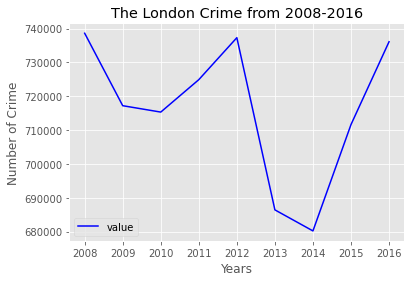

In [11]:
df_year.plot(kind='line', color='blue')

plt.title('The London Crime from 2008-2016')
plt.ylabel('Number of Crime')
plt.xlabel('Years')
plt.show()

**Interpretasi:** berdasarkan line plot yang dihasilkan terlihat bahwa jumlah kasus kriminal di London dari tahun 2008-2016 menunjukkan fulktuasi. penurunan tingkat kriminalitas terendah terjadi pada tahun 2012-2014, sedangkan pada tahun 2014-2016 terjadi peningkatan angka kriminalitas secara signifikan.

## Area Plot
**Question :** visualize the top 5 borough that have the most crime numbers

***pre-processing***

In [89]:
df_londoncrime = df_lc.drop(['lsoa_code', 'month'], axis=1)
df_londoncrime.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [90]:
df_crime = df_londoncrime.groupby(['borough', 'year'], axis=0).sum()
df_crime.head()

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990

In [91]:
df_unstack = df_crime.unstack()
df_unstack.head()

value                                                   \
year                   2008   2009   2010   2011   2012   2013   2014   2015   
borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
year                   2016  
borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

In [92]:
df_top5 = df_unstack.head(5).transpose()
df_top5

borough     Barking and Dagenham  Barnet  Bexley  Brent  Bromley
      year                                                      
value 2008                 17656   23944   15305  23504    24015
      2009                 17713   23449   14445  24748    21858
      2010                 17130   23416   13166  25512    19572
      2011                 16686   24007   11325  27669    19868
      2012                 15990   23573   11669  26357    19622
      2013                 15759   22510   11552  23759    18945
      2014                 15426   22572   11844  24426    19668
      2015                 16346   24036   11990  24883    20637
      2016                 16741   24684   12840  26693    20164

***Visualization:***

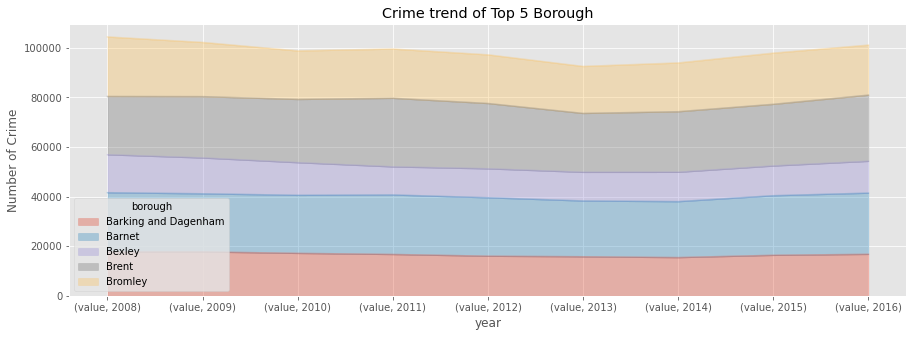

In [16]:
df_top5.plot(kind='area', alpha=0.35, stacked=True,
            figsize=(15,5),)
plt.title('Crime trend of Top 5 Borough')
plt.ylabel('Number of Crime')
plt.xlabel('year')
plt.show()

**interpretation:**
berdasarkan plot di atas terlihat bahwa pada tahun 2008-2016 Bromley mendominasi jumlah kejahatan terbanyak di London. kemudian disusul Brent pada tingkat dua tearatas, lalu Bexley pada urutan ketiga, Barnet keempat dan Barking and Dagenham pada urutan ke 5.

## Histogram

**Question:** what is the frequency distribution of the crime number in Redbridge during 2008 - 2016?

**pre-processing**

In [17]:
df_unstack.head()

value                                                   \
year                   2008   2009   2010   2011   2012   2013   2014   2015   
borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
year                   2016  
borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

In [18]:
df_rb = df_unstack.loc[['Redbridge']].transpose()
df_rb

borough     Redbridge
      year           
value 2008      20873
      2009      20837
      2010      20652
      2011      21994
      2012      21424
      2013      19793
      2014      19590
      2015      18897
      2016      19502

In [19]:
count, bin_edges = np.histogram(df_rb)

**visualization**

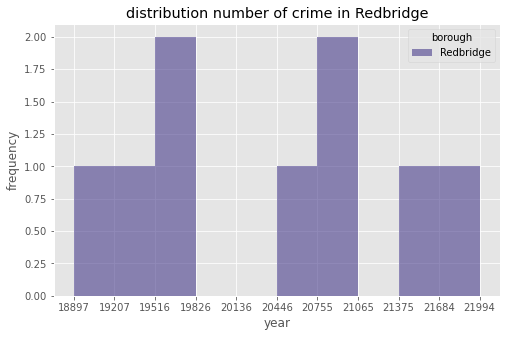

In [20]:
df_rb.plot(kind='hist', figsize=(8,5),
          bins=10, alpha= 0.6,
           xticks=bin_edges,
           color=['darkslateblue'])

plt.title('distribution number of crime in Redbridge')
plt.ylabel('frequency')
plt.xlabel('year')
plt.show()

**Interpretasi:** berdasarkan histogram diatas, dapat diketahui bahwa sebaran datanya cenderung simetris sehingga nilai median, modus, dan rataannya bernilai sama.

## Bar Chart

**Question:** compare the number crime in Brent from year 2008 - 2016

In [21]:
df_brent = df_unstack.loc[['Brent']].transpose()
df_brent

borough     Brent
      year       
value 2008  23504
      2009  24748
      2010  25512
      2011  27669
      2012  26357
      2013  23759
      2014  24426
      2015  24883
      2016  26693

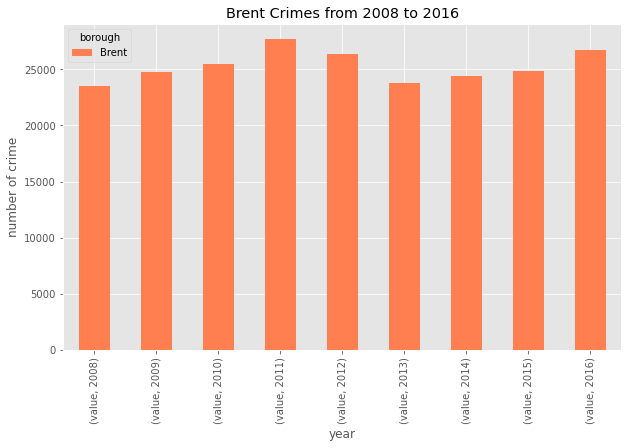

In [22]:
df_brent.plot(kind='bar', figsize=(10,6), color='coral')

plt.title('Brent Crimes from 2008 to 2016')
plt.xlabel('year')
plt.ylabel('number of crime')
plt.show()

**interpretation:** plot diatas menunjukkan angka kriminalitas yang dikelompokkan setiap tahun. bisa diketahui bahwa angka kriminalitas dari tahun 2008-2016 selalu berada di angka 23000-28000. angka tertinggi dan angka terendah berturut-turut terjadi di tahun 2011 dan 2008.

## Pie Chart

**Question:** explore the proportion (percentage) of major category in London during 2008-2016

**preprocessing**

In [23]:
df_major = df_londoncrime.groupby([ 'major_category']).sum()
df_major

,value,year
major_category,,
Burglary,754293,2099731248
Criminal Damage,630938,4163174064
Drugs,470765,2373089616
Fraud or Forgery,5325,475878240
Other Notifiable Offences,106349,1561923648
Robbery,258873,1890040608
Sexual Offences,1273,217513296
Theft and Handling,2661861,7980195600
Violence Against the Person,1558081,6381548928


In [24]:
major = df_major.drop(['year'], axis=1)
major

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


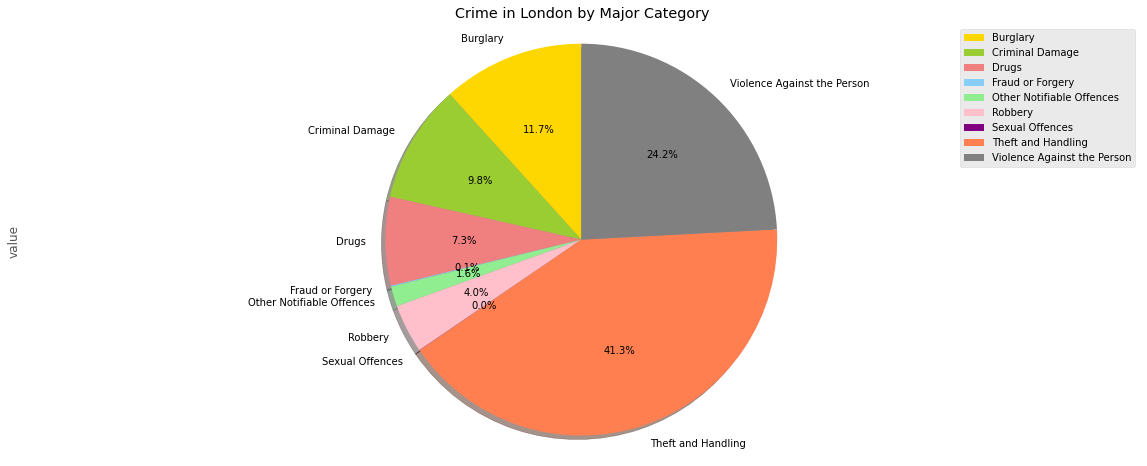

In [25]:
major.plot(kind='pie', figsize=(20, 8),
          autopct='%1.1f%%',
          startangle=90,
          shadow=True,
           subplots=True,
           colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink',
                   'purple', 'coral', 'grey']
          )
plt.title('Crime in London by Major Category')
plt.axis('equal')
plt.show()

**Interpretasi:** berdasarkan grafik pie chart yang dihasilkan, terlihat bahwa proporsi major category terbesar adalah theft and handing dengan persentase 41.3%. lalu disusul violence against the person sebesar 24.2%, bulglary 11.7%, criminal damage 9.8%, drugs 7.3%, robbery 4%, other notifiable offences 1.6%, fraud or forgery 0.1%, dan sexual offences memiliki proporsi paling rendah atau bahkan tidak terjadi karena presentase sebesar 0%.

## Box Plot

**Question:** explore distribution of crime in Brent from year 2008 - 2016

**Preprocessing**

In [26]:
df_brent = df_unstack.loc[['Brent']].transpose()
df_brent

borough     Brent
      year       
value 2008  23504
      2009  24748
      2010  25512
      2011  27669
      2012  26357
      2013  23759
      2014  24426
      2015  24883
      2016  26693

In [27]:
df_brent.describe()

borough,Brent
count,9.000000
mean,25283.444444
std,1394.413059
min,23504.000000
25%,24426.000000
50%,24883.000000
75%,26357.000000
max,27669.000000


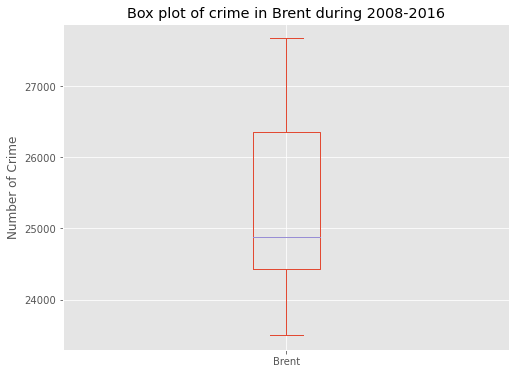

In [28]:
df_brent.plot(kind='box', figsize=(8,6))

plt.title('Box plot of crime in Brent during 2008-2016')
plt.ylabel('Number of Crime')
plt.show()

**interpretation:** dari grafik box plot yang telah di buat, dapat diperoleh beberapa observasi penting. pertama, nilai minimum dan maksimum jumlah kejahatan di Brent masing-masing berada di bawah 24000 (Sekitar 23000) dan diatas 27000 (sekitar 27500). kedua, selama 2008-2016 25% memiliki jumlah kejahatan sekitar 24500 dan 75% memiliki jumlah kejahatan sekitar 26000. untuk melihat angka aktual bisa dilihat pada output _**describe()**_

## Scatter Plot

**Question:** visualizing trend London crimes in al Borough during 2008-2016

**Preprocessing**

In [29]:
df_year = pd.DataFrame(df_londoncrime.groupby(['year'], axis=0).sum())
df_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [30]:
df_year.reset_index(inplace=True)

In [31]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    9 non-null      int64
 1   value   9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


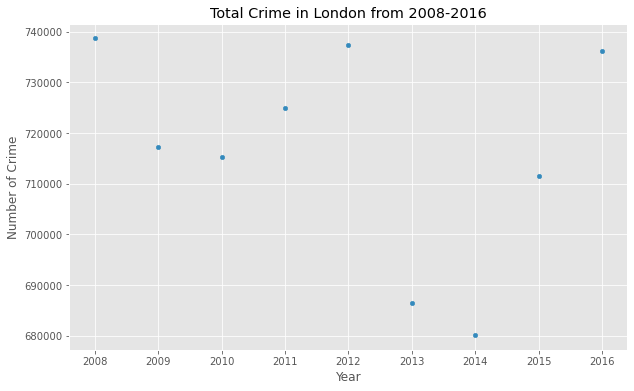

In [32]:
df_year.plot(kind='scatter', x='year', y='value', figsize=(10,6))
plt.title('Total Crime in London from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.show()

**interpretation:** pada grafik scatter plot terlihat bahwa trend naik tingkat kejahatan di London terjadi pada tahun 2010-2012 dan tahun 2014-2016, sedangkan pada tahun 2008-2010 dan 2012-2014 terjadi trend penurunan tingkat kejahatan di London.

## Word Clouds

**Question:** Create Wordcloud major_category from data Crime in London

**preprocessing**

In [64]:
from wordcloud import WordCloud, STOPWORDS

In [65]:
stopwords= set(STOPWORDS)

In [74]:
type(df_lc)

pandas.core.frame.DataFrame

In [88]:
words = df_lc['major_category']

In [89]:
words

0                              Burglary
1           Violence Against the Person
2           Violence Against the Person
3                              Burglary
4                               Robbery
                       ...             
13490599                Criminal Damage
13490600                        Robbery
13490601                       Burglary
13490602                        Robbery
13490603    Violence Against the Person
Name: major_category, Length: 13490604, dtype: object

In [93]:
wordcloud = WordCloud( background_color='white',
                      stopwords=stopwords)
wordcloud.generate("".join(words))

**Visualisasi:**

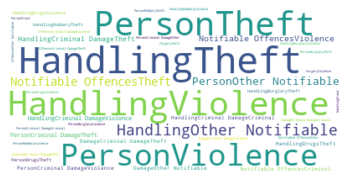

In [94]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Interpretasi:** Wordcould diatas memberikan informasi bahwa major_categori dalam crime in london di dominasi oleh Handling Theft, Person Theft, Handling Violence, dan Person violence.

## Folium Maps

**Question:** How were Crimes in London in General?

**Preprocessing**

In [43]:
!pip install folium
import folium

In [95]:
df_londoncrime.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [96]:
df_londoncrime.shape

(13490604, 5)

untuk mengurangi computational cost, akan diambil 100 insiden pertama dalam kumpulan data

In [97]:
limit = 100
df_londoncrime = df_londoncrime.iloc[0:limit, :]

In [98]:
df_londoncrime.shape

(100, 5)

install library untuk mendapatkan latitude dan longitude di tiap borough 

In [99]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [100]:
from geopy.geocoders import Nominatim

menambahkan kolom pada dataset yang berisi latitude dan longitude tiap borough

In [101]:
latitude = []
longitude = []

for borough in df_londoncrime["borough"]:
    geolocator = Nominatim(user_agent='myapplication')
    location = geolocator.geocode(borough)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

df_londoncrime["Latitude"] = latitude
df_londoncrime["Longitude"] = longitude

In [102]:
df_londoncrime.head()

,borough,major_category,minor_category,value,year,Latitude,Longitude
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,51.371305,-0.101957
1,Greenwich,Violence Against the Person,Other violence,0,2016,51.482084,-0.004542
2,Bromley,Violence Against the Person,Other violence,0,2015,51.402805,0.014814
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,51.576320,0.045410
4,Wandsworth,Robbery,Personal Property,0,2008,51.457027,-0.193261


**visualisasi:**

In [110]:
London_Crime = folium.map.FeatureGroup()

for lat, lng, in zip (df_londoncrime.Latitude, df_londoncrime.Longitude):
    London_Crime.add_child(
        folium.CircleMarker(
                [lat, lng],
                radius=12,
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
        ))
london_map.add_child(London_Crime)

**interpretasi:** dari peta yang telah dihasilkan terdapat titik biru dengan garis tepi kuning yang menandakan bahwa marker tersebut berada pada wilayah / borough yang memiliki kasus kejahatan.